# 数字の出現数を数える
## プログラムの概要
あるシステムが生成する認証コードは6桁の整数です。このコードに現れる各桁の数字(Digit)の分布がどの程度一様なのかを調べます。
実際に生成されたコードの一覧から、各桁の数字に分解して頻度を数えます。
まずは生成されたcodeの一覧を変数`codes`に割り当てます。

In [1]:
#!python3
#-*- coding:utf-8 -*-
# '#'以降は行末までがコメントになります。（プログラムとしては実行されない）
nlen=6 # コードの桁数は6桁
codes=(
    # 012345 のように0から始まるcodeは, 0を省いて書くことにします。
    227524,  463251,  702567,  601620,
    129458,  413239,  629380,  526093,
    261547,  666552,  853626,  513298,
    142167,  612906,  995697,  660500,
    954404,  651454,  566439,  730975,
    578967,  603424,  435636,  891667,
    757294,  325567,  131075,  757309, 
    198547,  542718,  511525,  357679,
    245280,
    # 2021/05/14
     40245, 314151, 689785, 246930, 429093,
    546479, 240262, 631261, 559379, 869925, 
    814588, 766660, 588608, 815828, 946364,
    542718, 710428, 725610, 863406, 250107, 
    629444, 865116,  86879, 
    # 2021/07/21
    162227, 132001, 167877, 898784, 225402,
    732262, 403174, 483069,  73898, 990700,
    272303, 489913, 473568, 662501, 590176, 
    631682, 633141, 714916, 944273, 211866,
    803916,  13252, 106412, 319172, 339634,
    752409, 570635, 265899, 944273, 211866
)

次に一つの code の各桁に現れる数字の出現回数を数えます。
一番下の桁から順番にみていきます。

In [2]:
def count_digits(code,nlen=6): #　関数　`count_digits`を定義します。
    # 最大二つの引数を持ちますが、二つ目の引数`nlen`は省略可能で、
    # 省略された場合の値(既定値)は6です。
    acc={} #これに数字毎の出現回数を入れていきます。
    code=code+10**nlen # 最上位が0の場合を取り扱うために、10**nlenを足しておく。
    # code =227524 であれば　code=1227524とするということ。
    while code>=10:
        code, d=divmod(code, 10) #商 `code` と余り `d` に分解します。
        # code=1227524　=> code=122752,d=4
        acc[d]=acc.get(d,0)+1 
        # accのkeyにdがあればその値に1を足したもの、さもなければ 0+1をacc[d]に設定する。
    return acc

一覧表`codes`の全ての`code`に現れる数字に頻度を数えて、足していきます。
結果の度数分布表`acc`を関数の値として返します。

In [3]:
def count_digits_in_list(codes,nlen):
    acc={}
    for code in codes: #codesの中に入っている全てのcodeについて
        count=count_digits(code,nlen) #コードの中の数字の出現表を作る。
        for d in count: #codeでの数字の出現数をaccに足して行く。
            acc[d]=acc.get(d,0)+count[d]
    return acc

`codes`の中の数字の度数分表を印刷し、ヒストグラムを表示させてみます。

In [4]:
import matplotlib.pyplot as pyplot #グラフ作成の準備のおまじない
import numpy

def main():
    counts=count_digits_in_list(codes,nlen) #codeの一覧codesから数字の出現数の表を作成する。
    print("digit:  count")# 印刷する表のラベルを印刷する。
    for d in sorted(counts): # 出現表にあらわれる数字を整列させた順番に、
        print (d,":",counts[d]) # 数字(d)とその出現数(count[d])を印刷する。
    # print("average:",len(codes)*nlen/10) #数字の出現数の平均値を印刷する。
    print("average:", sum(counts.values())/len(counts)) # 6*len(codes)/10
    print("std. dev:{:4.1f}".format(numpy.std(list(counts.values()))))
    pyplot.bar(counts.keys(),counts.values()) # barグラフを印刷する。
    pyplot.draw() #グラフ作成のおまじない
    pyplot.show() #グラフ作成の最後のおまじない. Jupyter Notebookでは不要


digit:  count
0 : 45
1 : 53
2 : 61
3 : 44
4 : 52
5 : 54
6 : 71
7 : 48
8 : 41
9 : 47
average: 51.6
std. dev: 8.5


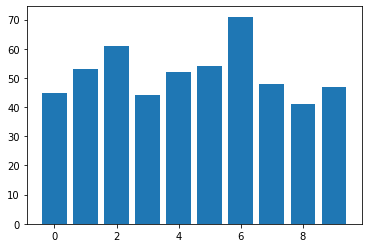

In [5]:
#ファイルをコマンドとして実行するためのおまじない
if __name__ == "__main__":
    main()

## pandas/DataFrame
Data Analysis分野で最近よく使われるDataFrameオブジェクトを使うと、
短いプログラムでデータのリストから度数分表を取出し、またヒストグラムを表示させることができます。

In [6]:
import pandas # DataFrameが使えるようにpandasをインポートして置きます。

def split_digits(code,nlen=6):
    acc=[] # あらわれた数字を順番に保存する。
    code=code+10**nlen # 最上位が0の場合を取り扱うため
    while code>=10:
        code,d=divmod(code,10)
        acc.insert(0,d)
    return acc

def split_codes():
    acc=[]
    for code in codes:
        acc +=split_digits(code)
    return acc

0    45
1    53
2    61
3    44
4    52
5    54
6    71
7    48
8    41
9    47
dtype: int64
average: 51.6


<AxesSubplot:xlabel='0'>

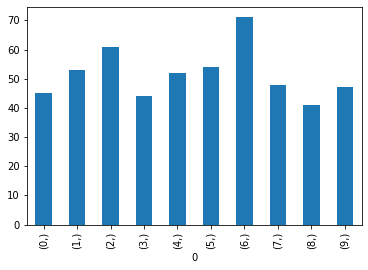

In [7]:
# codesのデータを一桁の数字に分解し、リストをつくります

df=pandas.DataFrame(split_codes()).value_counts(sort=False)
print(df)
print("average:",numpy.average(df))
df.plot.bar()

## matplotlib.pyplot

matplotlib.pyplotを使って、ヒストグラムの表示と度数分布を求めることも可能です。

まずヒストグラムを作成します。

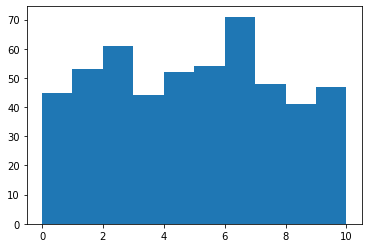

In [8]:
counts, digits, chart = pyplot.hist(
    split_codes(), 
    bins=range(0,11)
)

matplotlib.hist()関数は、ビン毎の計数値(count)、binの端の値(digits)そして、ヒストグラムのオブジェクトを値として返してきます。ですから、次のようなスクリプトで、各ビンのラベルと係数値を印刷します。digitsの要素数はcountsの要素数より1多いことに注意が必要です。

In [9]:
for p in (zip(digits,counts)):
    print(p)
print("average:", sum(counts)/len(counts))
print(len(digits), ">",len(counts))

(0, 45.0)
(1, 53.0)
(2, 61.0)
(3, 44.0)
(4, 52.0)
(5, 54.0)
(6, 71.0)
(7, 48.0)
(8, 41.0)
(9, 47.0)
average: 51.6
11 > 10


次に、数字の出現回数の分布をプロットしてみます。"5"および"6"の出現回数が突出していることが
見て取れます。

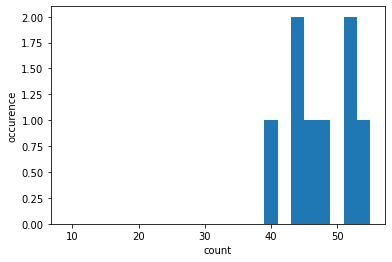

In [10]:
pyplot.hist(
    counts, 
    histtype="stepfilled",
    density=False,
    align="left",
    bins=range(34-3*8,34+3*8,2),
)
pyplot.gca().set_xlabel("count")
pyplot.gca().set_ylabel(u"occurence");